In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
import os

In [2]:
#import dataset
df = pd.read_csv('quaterlyECB.csv')
df.head()

,TIME,RGDP,HICP,M1,M3,LONFC,LOHH,LONFPS,CRNFPS,M12GDP,...,INDCONF,CSTRCONF,STOASSESS,BCI,CONCONF,RETCONF,SERVCONF,PMIMAN,PMICOMP,CAPUTILMANUF
0,1990Q1,1804547.170,58.65,23.45,29.57,1304063.315,1335500.397,2639563.712,4326.0,26.30,...,3.74,1.30,5.57,0.96,-2.59,1.74,NaN,NaN,NaN,84.431
1,1990Q2,1812744.699,59.10,23.62,30.00,1347475.600,1368718.692,2716194.292,4423.0,26.01,...,2.21,0.09,5.60,0.78,-3.00,1.79,NaN,NaN,NaN,84.525
2,1990Q3,1828762.717,59.71,24.14,30.65,1390924.156,1391283.918,2782208.074,4519.0,26.09,...,0.82,-0.64,5.50,0.56,-4.92,2.77,NaN,NaN,NaN,85.055
3,1990Q4,1839905.609,60.53,24.45,31.30,1443163.891,1417421.638,2860585.530,4652.0,25.99,...,-1.81,-5.34,7.67,0.21,-7.48,2.70,NaN,NaN,NaN,84.514
4,1991Q1,1852668.575,61.09,24.68,31.91,1483816.796,1443261.824,2927078.620,4737.0,25.68,...,-9.48,-8.99,10.51,-0.73,-9.41,-4.75,NaN,NaN,NaN,83.168


In [3]:
hicp = df['HICP'].values.astype(float) 
m1 = df['M1'].values.astype(float) #money supply
print(hicp)
print(m1)

hicp_lag = np.roll(hicp, 1)
hicp_lag[0] = 0

[ 58.65  59.1   59.71  60.53  61.09  61.63  62.49  63.05  63.66  64.23
  64.61  65.13  65.84  66.35  66.86  67.29  67.86  68.23  68.7   69.09
  69.62  70.06  70.45  70.83  71.38  71.78  71.96  72.3   72.79  72.85
  73.19  73.49  73.55  73.8   73.96  74.04  74.1   74.49  74.78  75.16
  75.59  75.9   76.45  76.92  77.09  77.84  78.18  78.36  79.04  79.47
  79.82  80.14  80.86  81.01  81.42  81.76  82.26  82.88  83.27  83.62
  83.96  84.54  85.2   85.54  85.91  86.58  87.05  87.05  87.53  88.25
  88.7   89.56  90.44  91.45  92.09  91.59  91.34  91.58  91.75  91.95
  92.43  93.02  93.31  93.8   94.79  95.47  95.9   96.5   97.36  97.84
  98.31  98.74  99.14  99.25  99.59  99.55  99.8   99.8   99.9   99.73
  99.68 100.16 100.09 100.07  99.72 100.07 100.34 100.82 101.5  101.56
 101.76 102.27 102.8  103.33 103.88 104.25 104.2  104.74 104.96 105.3
 105.37 104.96 104.89 105.03 106.35 106.9  108.06 109.88 112.88 115.51]
[ 23.45  23.62  24.14  24.45  24.68  24.89  25.08  25.29  25.4   25.75
  25.9

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Standardize rgdp
hicp = scaler.fit_transform(hicp.reshape(-1, 1)).flatten()

# Standardize fc
m1 = scaler.fit_transform(m1.reshape(-1, 1)).flatten()

In [8]:
# Use the standardized variables in the regression analysis
quant_reg_1 = sm.QuantReg(hicp, m1).fit(q=0.1)
quant_reg_5 = sm.QuantReg(hicp, m1).fit(q=0.5)
quant_reg_9 = sm.QuantReg(hicp, m1).fit(q=0.9)

# Print the summary of the quantile regression results
print(quant_reg_1.summary())
print(quant_reg_5.summary())
print(quant_reg_9.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.09714
Model:                       QuantReg   Bandwidth:                      0.3145
Method:                 Least Squares   Sparsity:                       0.9844
Date:                Thu, 09 Mar 2023   No. Observations:                  130
Time:                        20:44:01   Df Residuals:                      129
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9803      0.072     13.554      0.000       0.837       1.123
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.6653
Model:                       QuantReg   Bandwidth:  

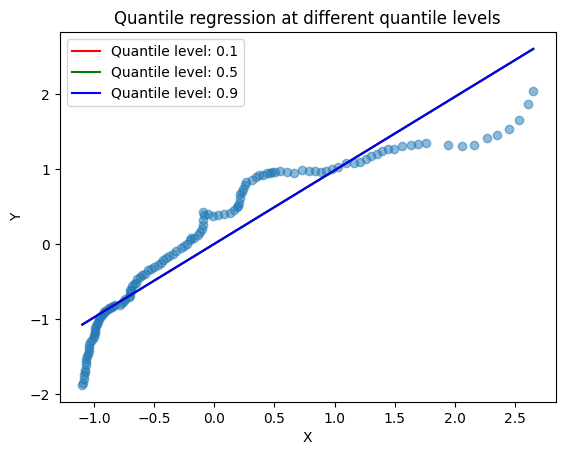

In [6]:
################################ Quantile regression plot ##############################
################################ Yt = α + βYt-1 + γXt + εt + θεt-1
# Create a scatter plot of the data
plt.scatter(m1, hicp, alpha=0.5)

# Plot the quantile regression lines at different quantile levels
x_sort = np.sort(m1)
y_pred_1 = quant_reg_1.predict(x_sort)
y_pred_5 = quant_reg_5.predict(x_sort)
y_pred_9 = quant_reg_9.predict(x_sort)

plt.plot(x_sort, y_pred_1, color='red', label='Quantile level: 0.1')
plt.plot(x_sort, y_pred_5, color='green', label='Quantile level: 0.5')
plt.plot(x_sort, y_pred_9, color='blue', label='Quantile level: 0.9')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quantile regression at different quantile levels')
plt.show()

#heteroskedasticity

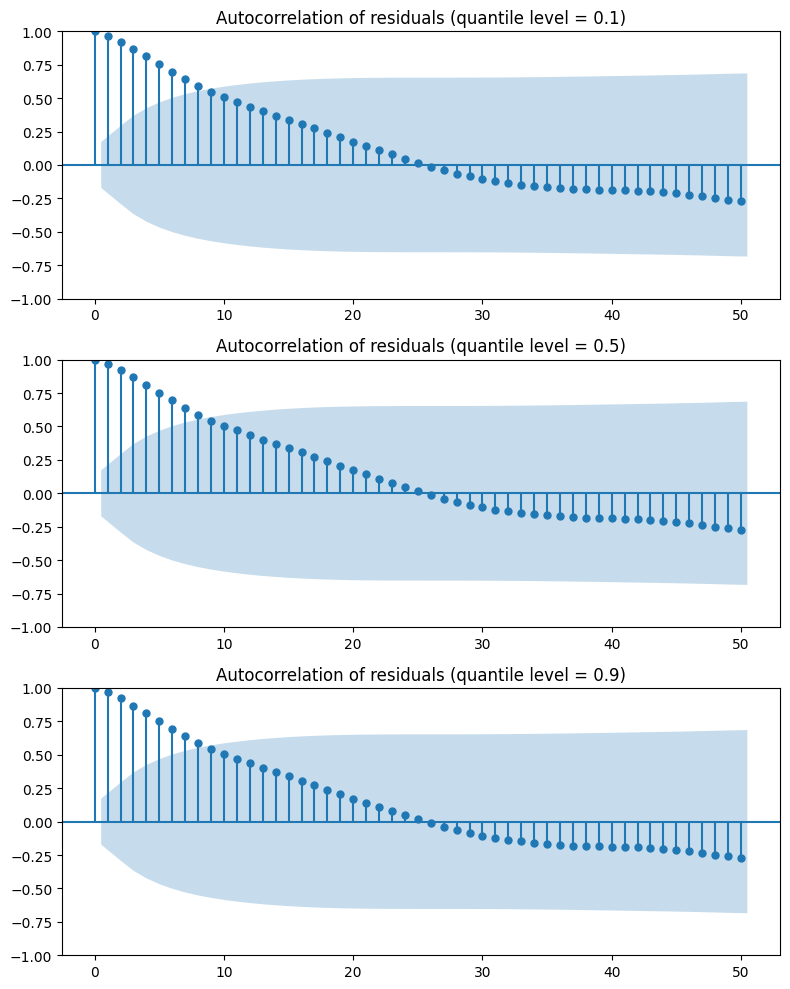

In [9]:
################################ Autocorrelation of the residuals ##############################
residuals_1 = quant_reg_1.resid # Calculate the residuals
residuals_5 = quant_reg_5.resid # Calculate the residuals
residuals_9 = quant_reg_9.resid # Calculate the residuals

# Plot the autocorrelation function of the residuals for all three quantile regression models in one plot
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
plot_acf(quant_reg_1.resid, lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation of residuals (quantile level = 0.1)')
plot_acf(quant_reg_5.resid, lags=50, ax=ax[1])
ax[1].set_title('Autocorrelation of residuals (quantile level = 0.5)')
plot_acf(quant_reg_9.resid, lags=50, ax=ax[2])
ax[2].set_title('Autocorrelation of residuals (quantile level = 0.9)')
plt.tight_layout()
plt.show()

#Autocorrelation fades away as the lags increase


In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform Ljung-Box test with up to 10 lags
lbtest = acorr_ljungbox(residuals_1, lags=50)

# Print p-values for each lag
print(lbtest)

        lb_stat      lb_pvalue
1    124.391761   6.915008e-29
2    238.404982   1.702221e-52
3    340.380884   1.804775e-73
4    430.118578   8.620062e-92
5    508.008968  1.490878e-107
6    574.912970  6.003033e-121
7    632.053210  3.037810e-132
8    680.894622  9.277747e-142
9    722.914669  8.181701e-150
10   759.568262  1.010113e-156
11   791.469539  1.285256e-162
12   819.008314  1.386873e-167
13   842.717419  9.734111e-172
14   862.931240  3.760748e-175
15   880.006005  6.697324e-178
16   894.132772  4.995135e-180
17   905.523738  1.403093e-181
18   914.380066  1.342130e-182
19   920.988942  3.790183e-183
20   925.662419  2.707133e-183
21   928.789216  4.036754e-183
22   930.709575  1.062860e-182
23   931.698706  4.316455e-182
24   932.052482  2.339292e-181
25   932.095643  1.443964e-180
26   932.123112  8.796783e-180
27   932.384751  4.687400e-179
28   933.080736  1.984350e-178
29   934.333989  6.296010e-178
30   936.256233  1.420356e-177
31   938.849909  2.279306e-177
32   942

In [11]:
from statsmodels.stats.stattools import durbin_watson
# Perform Durbin-Watson test
dwtest = durbin_watson(residuals_1)

# Print test statistic
print(dwtest)

#positive autocorrelation

0.012441635238816216


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


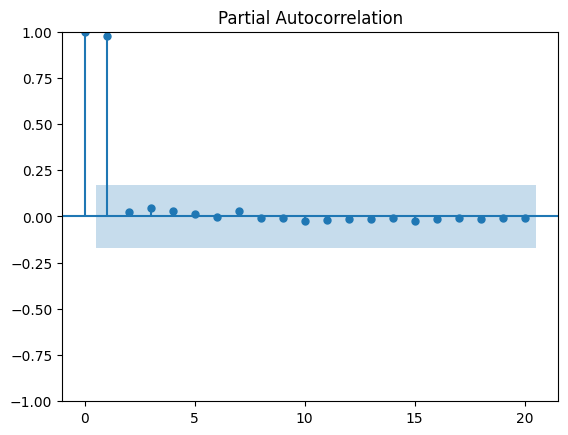

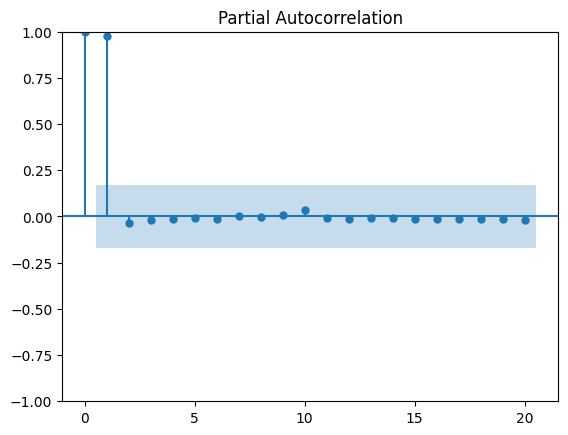

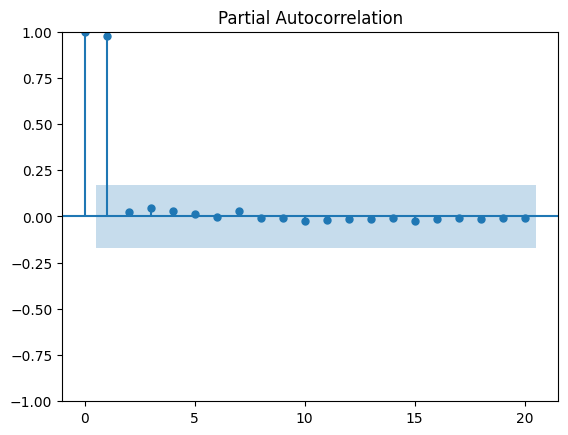

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of the time series
plot_pacf(m1, lags=20)
plot_pacf(hicp, lags=20)